In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!git clone https://github.com/cvlab-stonybrook/LearningToCountEverything

Cloning into 'LearningToCountEverything'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 64 (delta 17), reused 17 (delta 17), pack-reused 43
Unpacking objects: 100% (64/64), done.


# Setup 

In [3]:
%cd LearningToCountEverything/

/content/LearningToCountEverything


In [4]:
%ls

data/    learn2countEverything.png  orange_box_ex.txt  README.md  train.py
demo.py  model.py                   orange.jpg         test.py    utils.py


In [5]:
%cd data/

/content/LearningToCountEverything/data


In [6]:
# upload images_384_VarV2 and mask_images
!unzip images_384_VarV2.zip
!unzip mask_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: mask_images/2029_anno.png  
  inflating: mask_images/595_anno.png  
  inflating: mask_images/5667_anno.png  
  inflating: mask_images/3674_anno.png  
  inflating: mask_images/587_anno.png  
  inflating: mask_images/49_anno.png  
  inflating: mask_images/2894_anno.png  
  inflating: mask_images/5033_anno.png  
  inflating: mask_images/7698_anno.png  
  inflating: mask_images/345_anno.png  
  inflating: mask_images/5921_anno.png  
  inflating: mask_images/3883_anno.png  
  inflating: mask_images/4469_anno.png  
  inflating: mask_images/5082_anno.png  
  inflating: mask_images/6902_anno.png  
  inflating: mask_images/6400_anno.png  
  inflating: mask_images/5257_anno.png  
  inflating: mask_images/3247_anno.png  
  inflating: mask_images/4038_anno.png  
  inflating: mask_images/200_anno.png  
  inflating: mask_images/7547_anno.png  
  inflating: mask_images/2272_anno.png  
  inflating: mask_images/5936_anno.png  
  inflating:

In [8]:
%cd ..

/content/LearningToCountEverything


In [9]:
%ls

data/    learn2countEverything.png  orange_box_ex.txt  README.md  train.py
demo.py  model.py                   orange.jpg         test.py    utils.py


# Demo

In [10]:
!python demo.py --input-image orange.jpg --bbox-file orange_box_ex.txt

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100% 97.8M/97.8M [00:00<00:00, 198MB/s]
Bounding boxes: [[71, 49, 104, 83], [134, 119, 169, 151], [7, 200, 44, 236]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is:  29.15
===> Visualized output is saved to ./orange_out.png


# 2.2 - without adapt

In [30]:
!python test.py --data_path 'data/' -ts 'val'

Evaluation on val data
  0% 0/1286 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
190.jpg : actual-predicted:     13,   60.9, error:   47.9. Current MAE: 47.91, RMSE: 47.91:   0% 0/1286 [00:00<?, ?it/s]
191.jpg : actual-predicted:     15,   16.3, error:    1.3. Current MAE: 24.60, RMSE: 33.89:   0% 1/1286 [00:00<02:11,  9.80it/s]
192.jpg : actual-predicted:     19,   16.9, error:    2.1. Current MAE: 17.09, RMSE: 27.70:   0% 1/1286 [00:00<02:11,  9.80it/s]
194.jpg : actual-predicted:     82,   63.6, error:   18.4. Current MAE: 17.41, RMSE: 25.68:   0% 3/1286 [00:00<01:51, 11.51it/s]
195.jpg : actual-predicted:     10,    9.9, error:    0.1. Current MAE: 13.94, RMSE

### Validation

In [17]:
# get ground truth and predicted counts and plot scatter plot
count_file = 'count.csv'
count = open(count_file, 'r')
count_data = count.read()
count_data = count_data.split('\n')

In [18]:
count_data = count_data[:-1]
print(count_data)

['Id,ground_truth_count,predicted_count', '190.jpg,13,60.907745361328125', '191.jpg,15,16.291074752807617', '192.jpg,19,16.92741584777832', '194.jpg,82,63.642303466796875', '195.jpg,10,9.924295425415039', '196.jpg,85,61.27728271484375', '197.jpg,77,81.02568054199219', '198.jpg,69,61.1616325378418', '214.jpg,64,36.648799896240234', '215.jpg,259,96.38662719726562', '216.jpg,46,27.58968734741211', '217.jpg,60,72.2542953491211', '218.jpg,58,50.70586013793945', '219.jpg,47,50.34369659423828', '220.jpg,59,41.16701889038086', '221.jpg,42,23.79133415222168', '222.jpg,65,70.08517456054688', '224.jpg,20,16.00101089477539', '226.jpg,78,66.87071990966797', '227.jpg,25,69.66957092285156', '228.jpg,44,21.79428482055664', '229.jpg,25,47.625877380371094', '231.jpg,24,30.34103775024414', '232.jpg,27,47.71561050415039', '233.jpg,126,107.17872619628906', '234.jpg,38,40.76728057861328', '236.jpg,11,33.71512985229492', '237.jpg,65,75.41116333007812', '238.jpg,20,15.453472137451172', '239.jpg,26,24.55320739

In [19]:
ground_truth_count = []
predicted_count = []
for i in range(1, len(count_data)):
  temp = count_data[i].split(',')
  ground_truth_count.append(int(temp[1]))
  predicted_count.append(float(temp[2])) 

In [20]:
ground_truth_count = np.array(ground_truth_count)
predicted_count = np.array(predicted_count)

In [21]:
ground_truth_count.shape, predicted_count.shape

((1286,), (1286,))

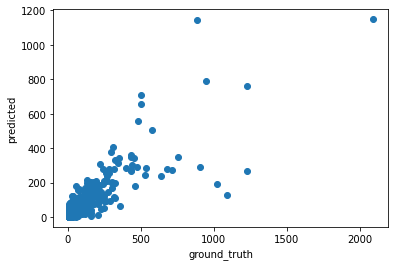

In [22]:
plt.scatter(ground_truth_count, predicted_count)
plt.xlabel("ground_truth")
plt.ylabel("predicted")
plt.show()

# 2.3 - with Test Time Adaptation

### Run for val-partA with test time adaptation

In [31]:
!python test.py --data_path 'data/' -ts 'val_PartA' -a -gs 500 -wn 1e-2

Evaluation on val_PartA data
  0% 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/content/LearningToCountEverything/utils.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Loss += F.mse_loss(X, ones)
/content/LearningToCountEverything/utils.py:126: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([17494, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Loss = F.mse_loss(output1, zeros

### Vadilation

In [32]:
# get ground truth and predicted counts and plot scatter plot
count_file = 'count.csv'
count = open(count_file, 'r')
count_data = count.read()
count_data = count_data.split('\n')

In [33]:
count_data = count_data[:-1]
print(count_data)

['Id,ground_truth_count,predicted_count', '2851.jpg,61,26.820907592773438', '4167.jpg,10,10.515422821044922', '4105.jpg,12,25.260976791381836', '5890.jpg,33,27.331195831298828', '253.jpg,192,141.9206085205078', '5089.jpg,11,11.928040504455566', '6722.jpg,36,38.53025817871094', '3873.jpg,7,4.955296993255615', '5898.jpg,32,41.29182052612305', '1929.jpg,86,102.62657928466797', '1391.jpg,42,49.09038162231445', '1900.jpg,12,14.298606872558594', '2877.jpg,111,63.246559143066406', '761.jpg,16,30.56096839904785', '7247.jpg,18,21.970027923583984', '4758.jpg,42,37.89552688598633', '2826.jpg,22,7.7957987785339355', '4590.jpg,8,8.776276588439941', '6721.jpg,11,12.816295623779297', '3662.jpg,10,11.003122329711914', '1981.jpg,159,153.59547424316406', '2003.jpg,20,12.64177131652832', '3760.jpg,12,8.16051197052002', '1902.jpg,94,81.25189971923828', '1945.jpg,44,34.01950454711914', '824.jpg,9,17.655254364013672', '4824.jpg,49,41.052772521972656', '239.jpg,26,22.93158531188965', '961.jpg,48,30.057514190

In [34]:
ground_truth_count = []
predicted_count = []
for i in range(1, len(count_data)):
  temp = count_data[i].split(',')
  ground_truth_count.append(int(temp[1]))
  predicted_count.append(float(temp[2])) 

In [35]:
ground_truth_count = np.array(ground_truth_count)
predicted_count = np.array(predicted_count)

In [36]:
ground_truth_count.shape, predicted_count.shape

((100,), (100,))

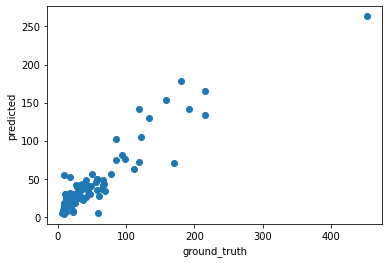

In [37]:
plt.scatter(ground_truth_count, predicted_count)
plt.xlabel("ground_truth")
plt.ylabel("predicted")
plt.show()

### Run for val-partA without test time adaptaion

In [45]:
!python test.py --data_path 'data/' -ts 'val_PartA'

Evaluation on val_PartA data
  0% 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
2851.jpg: actual-predicted:     61,   17.6, error:   43.4. Current MAE: 43.41, RMSE: 43.41:   0% 0/100 [00:00<?, ?it/s]
4167.jpg: actual-predicted:     10,   14.6, error:    4.6. Current MAE: 24.02, RMSE: 30.87:   0% 0/100 [00:00<?, ?it/s]
4105.jpg: actual-predicted:     12,   27.4, error:   15.4. Current MAE: 21.13, RMSE: 26.72:   2% 2/100 [00:00<00:10,  9.40it/s]
5890.jpg: actual-predicted:     33,   33.5, error:    0.5. Current MAE: 15.98, RMSE: 23.14:   2% 2/100 [00:00<00:10,  9.40it/s]
253.jpg : actual-predicted:    192,  170.3, error:   21.7. Current MAE: 17.13, RMSE: 22.87

### Vadilation

In [46]:
# get ground truth and predicted counts and plot scatter plot
count_file = 'count.csv'
count = open(count_file, 'r')
count_data = count.read()
count_data = count_data.split('\n')

In [47]:
count_data = count_data[:-1]
print(count_data)

['Id,ground_truth_count,predicted_count', '2851.jpg,61,17.585205078125', '4167.jpg,10,14.623456954956055', '4105.jpg,12,27.35610008239746', '5890.jpg,33,33.533382415771484', '253.jpg,192,170.2755889892578', '5089.jpg,11,14.774792671203613', '6722.jpg,36,56.750770568847656', '3873.jpg,7,2.9472317695617676', '5898.jpg,32,54.94309616088867', '1929.jpg,86,109.41790771484375', '1391.jpg,42,67.7984619140625', '1900.jpg,12,15.61505126953125', '2877.jpg,111,46.54526901245117', '761.jpg,16,43.899070739746094', '7247.jpg,18,22.93277359008789', '4758.jpg,42,46.744693756103516', '2826.jpg,22,3.537313461303711', '4590.jpg,8,10.018990516662598', '6721.jpg,11,15.152978897094727', '3662.jpg,10,12.697052001953125', '1981.jpg,159,181.16500854492188', '2003.jpg,20,12.145344734191895', '3760.jpg,12,5.731661796569824', '1902.jpg,94,97.58260345458984', '1945.jpg,44,35.332923889160156', '824.jpg,9,20.256240844726562', '4824.jpg,49,45.64595031738281', '239.jpg,26,24.553207397460938', '961.jpg,48,28.2432098388

In [48]:
ground_truth_count = []
predicted_count = []
for i in range(1, len(count_data)):
  temp = count_data[i].split(',')
  ground_truth_count.append(int(temp[1]))
  predicted_count.append(float(temp[2])) 

In [49]:
ground_truth_count = np.array(ground_truth_count)
predicted_count = np.array(predicted_count)

In [50]:
ground_truth_count.shape, predicted_count.shape

((100,), (100,))

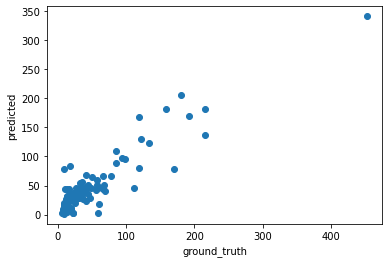

In [51]:
plt.scatter(ground_truth_count, predicted_count)
plt.xlabel("ground_truth")
plt.ylabel("predicted")
plt.show()

# 2.4 - Test Time With Adaptaion, kaggle submission

In [ ]:
!python test.py --data_path 'data/' -ts 'test' -a -gs 1000 -wn 1e-2

Evaluation on test data
  0% 0/1190 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/content/LearningToCountEverything/utils.py:126: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([173170, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Loss = F.mse_loss(output1, zeros, reduction='mean')
/content/LearningToCountEverything/utils.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Loss += F.m